``application_{train|test}.csv``
- Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
- Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

``bureau.csv``
- Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit     (pour les clients qui ont un prêt dans notre échantillon).
- Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit     
  Bureau avant la date de la demande.

``bureau_balance.csv``
- Soldes mensuels des crédits antérieurs au bureau de crédit.
- Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-     à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique   observable pour les crédits précédents) lignes .

``POS_CASH_balance.csv``
- Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec  Home Credit.
- Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).

``credit_card_balance.csv``
- Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
- Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.

``previous_application.csv``
- Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
- Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

`installments_payments.csv``
- Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.
  Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
- Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier  lié aux prêts de notre échantillon.

``HomeCredit_columns_description.csv``
- Ce fichier contient les descriptions des colonnes des différents fichiers de données.


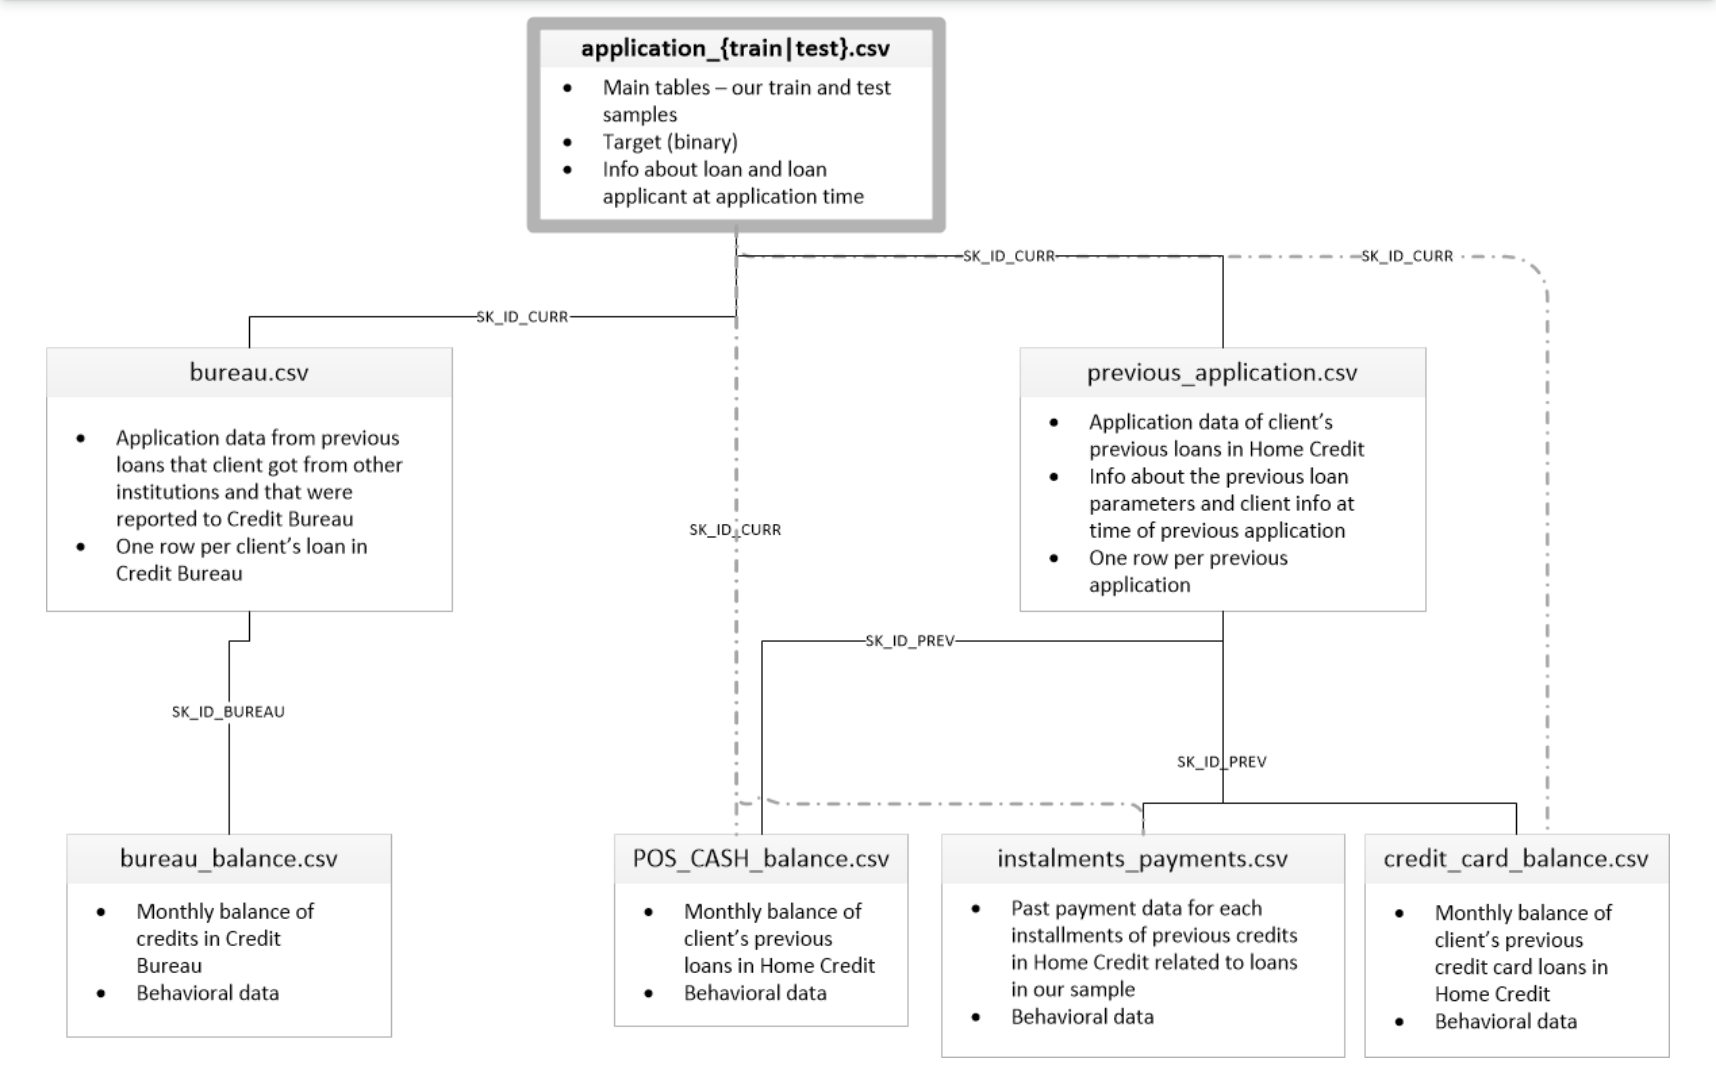

https://www.kaggle.com/c/home-credit-default-risk/data (lien de la data)

Inspiré du kernel : https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook
https://www.kaggle.com/code/danilz/merge-all-data-base-glm-vs-xgb-explained-0-763/notebook

In [1]:
pip install shap==0.28.0

  Using cached shap-0.28.0.tar.gz (221 kB)
  Running setup.py clean for shap
Failed to build shap
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\DEYTA\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DEYTA\\AppData\\Local\\Temp\\pip-install-pckrn11v\\shap_7d81c8ab49004e9a8dd96f1ff7ee706c\\setup.py'"'"'; __file__='"'"'C:\\Users\\DEYTA\\AppData\\Local\\Temp\\pip-install-pckrn11v\\shap_7d81c8ab49004e9a8dd96f1ff7ee706c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\DEYTA\AppData\Local\Temp\pip-wheel-dh1_qxc7'
       cwd: C:\Users\DEYTA\AppData\Local\Temp\pip-install-pckrn11v\shap_7d81c8ab49004e9a8dd96f1ff7ee706c\
  Complete output (55 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating bui

  Attempting uninstall: shap
    Found existing installation: shap 0.41.0
    Uninstalling shap-0.41.0:
      Successfully uninstalled shap-0.41.0
    Running setup.py install for shap: started
    Running setup.py install for shap: finished with status 'error'
  Rolling back uninstall of shap
  Moving to c:\users\deyta\appdata\roaming\python\python39\site-packages\shap-0.41.0.dist-info\
   from C:\Users\DEYTA\AppData\Roaming\Python\Python39\site-packages\~hap-0.41.0.dist-info
  Moving to c:\users\deyta\appdata\roaming\python\python39\site-packages\shap\
   from C:\Users\DEYTA\AppData\Roaming\Python\Python39\site-packages\~hap


  copying shap\explainers\deep\deep_pytorch.py -> build\lib.win-amd64-3.9\shap\explainers\deep
  copying shap\explainers\deep\deep_tf.py -> build\lib.win-amd64-3.9\shap\explainers\deep
  copying shap\explainers\deep\__init__.py -> build\lib.win-amd64-3.9\shap\explainers\deep
  creating build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\colors.py -> build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\dependence.py -> build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\embedding.py -> build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\force.py -> build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\force_matplotlib.py -> build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\image.py -> build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\monitoring.py -> build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\summary.py -> build\lib.win-amd64-3.9\shap\plots
  copying shap\plots\__init__.py -> build\lib.win-amd64-3.9\shap\plots
  creating build\lib.win-amd64-3.9\

In [2]:
import pandas as pd
import seaborn as sns
import time, pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
#from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

#Predictive Models
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold, GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import precision_recall_curve

# numpy et pandas pour la manipulation de données
import numpy as np
import pandas as pd 
from imblearn.over_sampling import SMOTE
# prétraitement sklearn pour traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Supprimer les avertissements 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour le traçage
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv ('data.csv')

In [4]:
del data['Unnamed: 0']

In [5]:
data

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9995,172551,NaN,1,0,0,0,135000.0,454500.0,29173.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,9996,172556,NaN,0,1,1,1,180000.0,500490.0,52555.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,9997,172562,NaN,1,0,0,0,202500.0,523152.0,37336.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,9998,172570,NaN,0,0,0,1,382500.0,967500.0,31338.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0


In [6]:
data_test_T =  pd.read_csv ('data_test_T.csv')
data_train_T =  pd.read_csv ('data_train_T.csv')

In [7]:
del data_train_T['Unnamed: 0']
del data_test_T['Unnamed: 0']

In [8]:
data_train_T

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,111629,0.0,1,1,0,1,135000.0,270000.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9996,111630,0.0,1,1,0,0,166500.0,1006920.0,51543.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9997,111631,0.0,0,1,0,0,225000.0,497520.0,53581.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,9998,111632,0.0,1,0,1,0,360000.0,348264.0,27643.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print('Shape train:' ,data_train_T.shape )
print('Shape test :' ,data_test_T.shape )
print('Shape data :' ,data.shape )

Shape train: (10000, 768)
Shape test : (10000, 768)
Shape data : (20000, 768)


In [10]:
data_train_T

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,111629,0.0,1,1,0,1,135000.0,270000.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9996,111630,0.0,1,1,0,0,166500.0,1006920.0,51543.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9997,111631,0.0,0,1,0,0,225000.0,497520.0,53581.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,9998,111632,0.0,1,0,1,0,360000.0,348264.0,27643.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
f_score = dict()
lim = dict()
feats = [f for f in data_train_T.columns if f not in [
    'TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index']]
np.savetxt("feats.csv", np.atleast_2d(feats), fmt="%s", delimiter=",")



In [12]:
feats

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APA

### Modelisation

### La fonction coût sera déterminée par l'analyse des erreurs de prédiction

- FP (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative.
 Perte d'opportunité si le crédit client est refusé à tort, alors qu'il aurait été en mesure d'être remboursé.

- FN (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive.

 Perte réelle si le crédit client accepté se transforme en défaut de paiement.

Ainsi, les pertes d'un crédit en raison d'une mauvaise classification dépendront des probabilités Faux Positifs et Faux Négatifs.
L'idée est d'éviter les clients avec un fort risque de défaut. Il est donc nécessaire de pénaliser les FP et FN cités précédemment. Pour réduire ce rique de perte financière, il faut maximiser deux critères Recall et Precision.

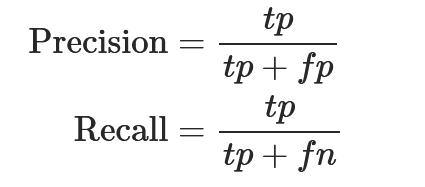

Fonction qui optimise Precision et Recall avec une importance plus forte pour le critère Precision: 
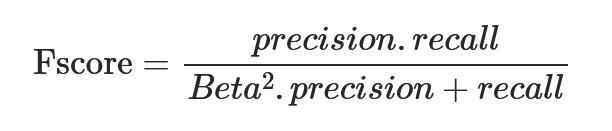
Avec Beta le coefficient d'importance relative au critère Precision par rapport au recall : 
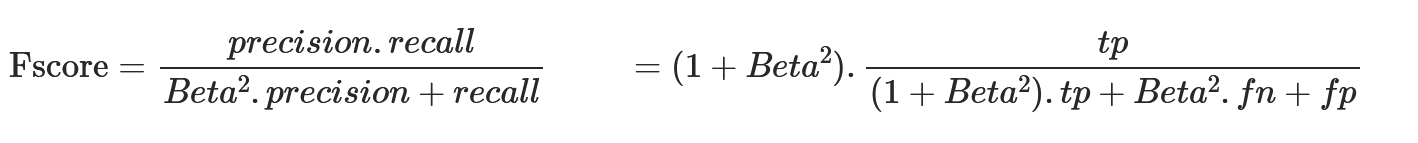

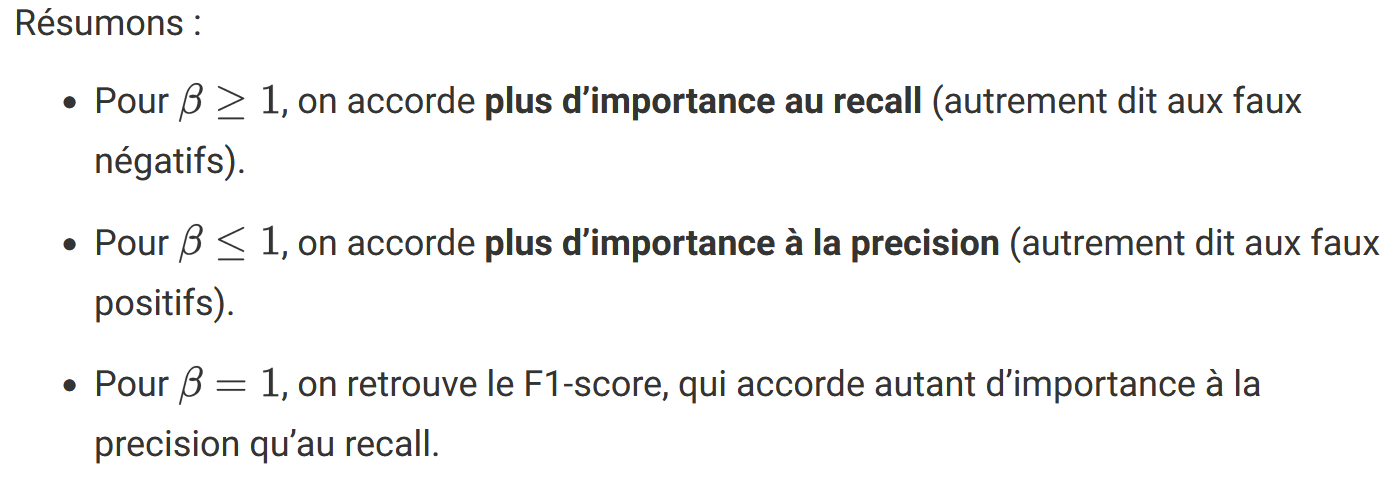
- Pour Beta >= 1 , on accorde plus d’importance au recall (autrement dit aux faux négatifs).
- Pour Beta <= 1, on accorde plus d’importance à la precision (autrement dit aux faux positifs).
- Pour Beta = 1, on retrouve le F1-score, qui accorde autant d’importance à la precision qu’au recall.




Le F1-score étant une moyenne harmonique de la précision et du recall, il n’est élevé qu’à condition que ces deux indicateurs soient élevés. Il traduit donc bien un compromis entre precision et recall. Lorsque le recall baisse par exemple, le terme augmente fortement et le F1-score diminue.

L'application de cette métrique métier passe par la quantification de l'importance relative entre recall et précision, à savoir Beta (β). Cela revient à estimer le coût moyen d'un défaut, et le coût d'opportunité d'un client refusé par erreur. Cette connaissance métier n'est pas évoquée à ce stade du projet, nous allons donc l'estimer. Cette hypothèse pourra bien entendu être modifiée avec un interlocuteur métier.

Défaut de paiement 60% du montant du crédit en pertes et autres frais de recouvrement.
10% de chance d'obtenir un crédit pour un client lambda qui souhaite emprunter.

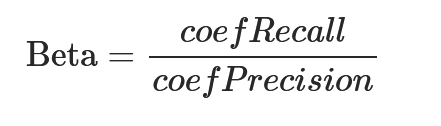

https://en.wikipedia.org/wiki/Precision_and_recall

In [13]:
#Permet de produire la courbe du fbeta score
def fbscore (X, y, beta = 1):
    
    pre, rec, thresh = precision_recall_curve(X, y)
    pre = pre[:-1]
    rec = rec[:-1]
    
    b2 = beta**2
    temp = pd.DataFrame(pre, columns=["pre"])
    temp["rec"] = rec
    temp["fb"] = ((1 + b2)*(temp["pre"] * temp["rec"]))/(b2 * temp["pre"] + temp["rec"])
    temp["fb"].fillna(0, inplace=True)
    fb = temp["fb"].to_numpy()
    
    return fb, thresh



In [14]:
# D'après la courbe du fbeta score, classe les éléments dans une ou l'autre catégorie selon la 
# probabilité correspondant au fbeta score maximal
def classifier (target, fbtab, thresh):
    lim = thresh[np.argmax(fbtab)]
    tab_class = (target > lim).astype(int)
    return tab_class, lim

In [15]:
# met en forme les parametres de sortie du grid-search du pipeline pour être compatible avec l'algorithme 
def best_params(gs):
    dic = gs.best_params_
    a = list(dic.keys())
    temp = pd.Series(list(dic.keys()))
    b = temp.str.split("__").str[1].to_numpy()
    for i in range(len(a)):
        dic[b[i]] = dic.pop(a[i])
    return dic

### LGBMClassifier

In [16]:
def lightgbm(num_folds, beta = 1, grid_search = True):
    
    
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(data_train_T.shape, data_test_T.shape))
    
    if grid_search :
        over = SMOTE(sampling_strategy=0.2)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        clf = LGBMClassifier()
        steps = [("over", over), ("under", under), ("model", clf)]
        LGBM_pipe = Pipeline(steps=steps)

        params = [{"model__n_estimators" : [100, 1000, 10000],
                  "model__learning_rate" : [0.001, 0.01, 0.1], 
                  "model__num_leaves" : [20, 30, 40]}]

        
        gs_LGBM = GridSearchCV(LGBM_pipe,
                              param_grid = params,
                               scoring = "roc_auc",
                               cv=5)

        gs_LGBM.fit(data_train_T[feats], data_train_T['TARGET'])
        params = best_params(gs_LGBM)
        print(params)
    else :
        params = {'learning_rate': 0.01, 'n_estimators': 1000, 'num_leaves': 20}
         #'num_leaves': 60, 'n_estimators': 150, 'learning_rate': 0.2
    # Divide in training/validation and test data

    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001) #Nbr folds à modifier
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(data_train_T.shape[0])
    sub_preds = np.zeros(data_test_T.shape[0])
    feature_importance_df = pd.DataFrame()



    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(data_train_T[feats], data_train_T['TARGET'])):
        train_x, train_y = data_train_T[feats].iloc[train_idx], data_train_T['TARGET'].iloc[train_idx]
        valid_x, valid_y = data_train_T[feats].iloc[valid_idx], data_train_T['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        over = SMOTE(sampling_strategy=0.3)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        clf = LGBMClassifier(**params)

        steps = [("over", over), ("under", under), ("model", clf)]
        pipeline = Pipeline(steps=steps)
    
        pipeline.fit(train_x, train_y, model__eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            model__eval_metric= "auc", model__verbose= 200, model__early_stopping_rounds= 200)

        oof_preds[valid_idx] = pipeline.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += pipeline.predict_proba(data_test_T[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
        


        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        

        
        del clf, train_x, train_y, valid_x, valid_y, pipeline
        
    fb_lgbm, thresh = fbscore(data_train_T["TARGET"], oof_preds, beta)
    print ("F-{} score max : {}".format(beta, np.max(fb_lgbm)))
    data_test_T["TARGET LGBM"], lim["LGBM"] = classifier(sub_preds, fb_lgbm, thresh)
    data_test_T["TARGET LGBM score"] = sub_preds
    
  
    return feature_importance_df, np.max(fb_lgbm), oof_preds, params

In [17]:
def RF_classifier(num_folds, beta = 1, grid_search = True):
    
    print("Starting Random Forest. Train shape: {}, test shape: {}".format(data_train_T.shape, data_test_T.shape))
    
    if grid_search :
        over = SMOTE(sampling_strategy=0.2)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        clf = RandomForestClassifier()
        steps = [("over", over), ("under", under), ("model", clf)]
        RF_pipe = Pipeline(steps=steps)

        params = [{"model__n_estimators" : [10, 100, 1000],
                  "model__max_features" : ["sqrt", "log2"], 
                  "model__n_jobs" : [6]}]

        gs_RF = GridSearchCV(RF_pipe,
                              param_grid = params,
                               scoring = "roc_auc",
                               cv=5)

        gs_RF.fit(data_train_T[feats], data_train_T['TARGET'])
        params = best_params(gs_RF)
        print(params)
    else :
        params = {'max_features': 'sqrt', 'n_estimators': 1000, 'n_jobs': 6}
    # Divide in training/validation and test data

    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001) #Nbr folds à modifier
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(data_train_T.shape[0])
    sub_preds = np.zeros(data_test_T.shape[0])
    feature_importance_df = pd.DataFrame()



    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(data_train_T[feats], data_train_T['TARGET'])):
        train_x, train_y = data_train_T[feats].iloc[train_idx], data_train_T['TARGET'].iloc[train_idx]
        valid_x, valid_y = data_train_T[feats].iloc[valid_idx], data_train_T['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        over = SMOTE(sampling_strategy=0.2)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        clf = RandomForestClassifier(**params)

        steps = [("over", over), ("under", under), ("model", clf)]
        pipeline = Pipeline(steps=steps)
   
        pipeline.fit(train_x, train_y)

        oof_preds[valid_idx] = pipeline.predict_proba(valid_x)[:, 1]
        sub_preds += pipeline.predict_proba(data_test_T[feats])[:, 1] / folds.n_splits
        


        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        

        
        del clf, pipeline, train_x, train_y, valid_x, valid_y
        
    fb_lgbm, thresh = fbscore(data_train_T["TARGET"], oof_preds, beta)
    print ("F-{} score max : {}".format(beta, np.max(fb_lgbm)))
    data_test_T["TARGET RF"], lim["RF"] = classifier(sub_preds, fb_lgbm, thresh)
   
    return feature_importance_df, np.max(fb_lgbm)

### KNeighborsClassifier

In [18]:
def KNN_classifier(num_folds, beta = 1, grid_search = False):
    
    print("Starting KNN. Train shape: {}, test shape: {}".format(data_train_T.shape, data_test_T.shape))
    
    if grid_search :
        over = SMOTE(sampling_strategy=0.2)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        clf = KNeighborsClassifier()
        steps = [("over", over), ("under", under), ("model", clf)]
        RF_pipe = Pipeline(steps=steps)

        params = [{"model__n_neighbors" : [4, 5, 6, 7, 8, 9],
                  "model__algorithm" : ["ball_tree", "kd_tree"], 
                  "model__n_jobs" : [6]}]

        gs_RF = GridSearchCV(RF_pipe,
                              param_grid = params,
                               scoring = "roc_auc",
                               cv=5)

        gs_RF.fit(data_train_T[feats], data_train_T['TARGET'])
        params = best_params(gs_RF)
        print(params)
    else :
        params = {'algorithm': 'kd_tree', 'n_jobs': 6, 'n_neighbors': 9}
    # Divide in training/validation and test data

    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001) #Nbr folds à modifier
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(data_train_T.shape[0])
    sub_preds = np.zeros(data_test_T.shape[0])
    feature_importance_df = pd.DataFrame()



    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(data_train_T[feats], data_train_T['TARGET'])):
        train_x, train_y = data_train_T[feats].iloc[train_idx], data_train_T['TARGET'].iloc[train_idx]
        valid_x, valid_y = data_train_T[feats].iloc[valid_idx], data_train_T['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        over = SMOTE(sampling_strategy=0.1)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        clf = KNeighborsClassifier(**params)

        steps = [("over", over), ("under", under), ("model", clf)]
        pipeline = Pipeline(steps=steps)

        pipeline.fit(train_x, train_y)

        oof_preds[valid_idx] = pipeline.predict_proba(valid_x)[:, 1]
        sub_preds += pipeline.predict_proba(data_test_T[feats])[:, 1] / folds.n_splits      

        
        del clf, train_x, train_y, valid_x, valid_y, pipeline
        
    fb_lgbm, thresh = fbscore(data_train_T["TARGET"], oof_preds, beta)
    print ("F-{} score max : {}".format(beta, np.max(fb_lgbm)))
    data_test_T["TARGET KNN"], lim["KNN"] = classifier(sub_preds, fb_lgbm, thresh)
   
    return np.max(fb_lgbm)

In [19]:
def Dummy_classifier(num_folds, beta = 1):
    
    print("Starting Logistic Regression. Train shape: {}, test shape: {}".format(data_train_T.shape, data_test_T.shape))
    

    # Divide in training/validation and test data

    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001) #Nbr folds à modifier
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(data_train_T.shape[0])
    sub_preds = np.zeros(data_test_T.shape[0])



    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(data_train_T[feats], data_train_T['TARGET'])):
        train_x, train_y = data_train_T[feats].iloc[train_idx], data_train_T['TARGET'].iloc[train_idx]
        valid_x, valid_y = data_train_T[feats].iloc[valid_idx], data_train_T['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        over = SMOTE(sampling_strategy=0.2)
        under = RandomUnderSampler(sampling_strategy = 0.5)
        clf = DummyClassifier(**{'strategy': 'most_frequent'})

        steps = [("over", over), ("under", under), ("model", clf)]
        pipeline = Pipeline(steps=steps)
 
        pipeline.fit(train_x, train_y)

        oof_preds[valid_idx] = pipeline.predict_proba(valid_x)[:, 1]
        sub_preds += pipeline.predict_proba(data_test_T[feats])[:, 1] / folds.n_splits      

        
        del clf, train_x, train_y, valid_x, valid_y, pipeline
        
    fb_lgbm, thresh = fbscore(data_train_T["TARGET"], oof_preds, beta)
    print ("F-{} score max : {}".format(beta, np.max(fb_lgbm)))
    data_test_T["TARGET Dammy"], lim["Dammy"] = classifier(sub_preds, fb_lgbm, thresh)
   
    return np.max(fb_lgbm)

In [20]:
feature_imp_lgbm, f_score["LGBM"], pred_train, params_lgbm = lightgbm(num_folds = 6, beta = 0.1, grid_search=False)


Starting LightGBM. Train shape: (10000, 768), test shape: (10000, 768)
[200]	valid_0's auc: 0.831536	valid_0's binary_logloss: 0.285585	valid_1's auc: 0.766517	valid_1's binary_logloss: 0.302517
[400]	valid_0's auc: 0.889861	valid_0's binary_logloss: 0.231302	valid_1's auc: 0.771125	valid_1's binary_logloss: 0.270402
[600]	valid_0's auc: 0.931725	valid_0's binary_logloss: 0.200708	valid_1's auc: 0.768064	valid_1's binary_logloss: 0.262433
[200]	valid_0's auc: 0.828672	valid_0's binary_logloss: 0.287126	valid_1's auc: 0.723028	valid_1's binary_logloss: 0.315506
[400]	valid_0's auc: 0.888067	valid_0's binary_logloss: 0.229111	valid_1's auc: 0.746155	valid_1's binary_logloss: 0.276892
[600]	valid_0's auc: 0.929663	valid_0's binary_logloss: 0.199817	valid_1's auc: 0.749991	valid_1's binary_logloss: 0.268048
[200]	valid_0's auc: 0.817395	valid_0's binary_logloss: 0.286787	valid_1's auc: 0.76223	valid_1's binary_logloss: 0.2995
[400]	valid_0's auc: 0.885947	valid_0's binary_logloss: 0.232766

In [21]:
feature_imp_rf, f_score["RF"] = RF_classifier(num_folds = 6, beta = 0.1, grid_search=False)

Starting Random Forest. Train shape: (10000, 768), test shape: (10000, 770)
F-0.1 score max : 0.3533079847908745


In [22]:
f_score["KNN"] = KNN_classifier(num_folds = 6, beta = 0.1, grid_search=False)

Starting KNN. Train shape: (10000, 768), test shape: (10000, 771)
F-0.1 score max : 0.15317535545023697


In [23]:
f_score["Dummy"] = Dummy_classifier(num_folds = 6, beta = 0.1)

Starting Logistic Regression. Train shape: (10000, 768), test shape: (10000, 772)
F-0.1 score max : 0.07821438385251431


In [24]:
data_test_T["TARGET LGBM"].value_counts()

0    9847
1     153
Name: TARGET LGBM, dtype: int64

Text(0.5, 1.0, 'Credit acceptation repartition')

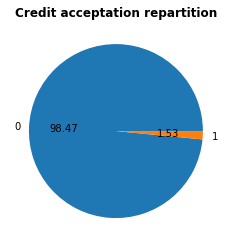

In [25]:
plt.figure()
plt.pie(data_test_T["TARGET LGBM"].value_counts(), 
        labels=data_test_T["TARGET LGBM"].value_counts().index, 
        autopct="%.2f")
plt.title("Credit acceptation repartition", weight="bold")

### comparaison des algorithmes

Text(0.5, 1.0, "fbeta score selon l'algorithme")

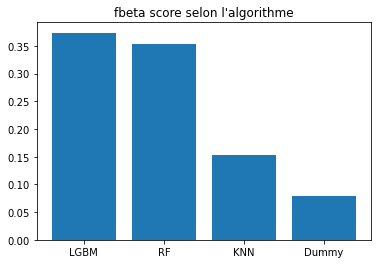

In [26]:
plt.bar(f_score.keys(), f_score.values())
plt.title("fbeta score selon l'algorithme")

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresh2 = roc_curve(data_train_T["TARGET"], pred_train)
auc = roc_auc_score(data_train_T["TARGET"], pred_train)

In [28]:
fbres, thresh = fbscore(data_train_T["TARGET"], pred_train, 0.1)
prec, rec, _ = precision_recall_curve(data_train_T["TARGET"], pred_train)

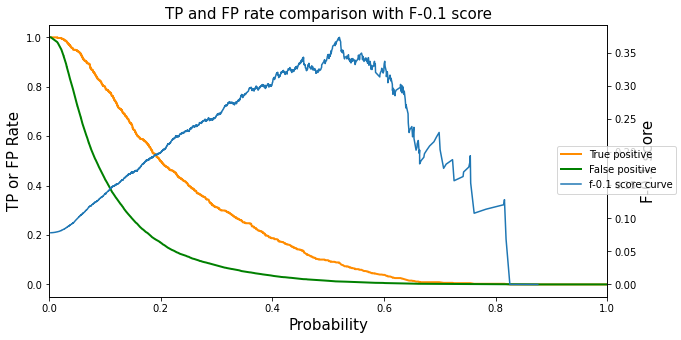

In [29]:
fig = plt.figure(1, figsize=(10, 5))
#fig = plt.figure(figsize=(20,15))
  
ax1 = plt.subplot()
#fig, ax1 = plt.subplots()
lw = 2
ax1.plot(
    thresh2,
    tpr,
    color="darkorange",
    lw=lw,
    label="True positive" % auc,
)
ax1.plot(
    thresh2,
    fpr,
    color="green",
    lw=lw,
    label="False positive" % auc,
)

ax1.set_xlabel("Probability",fontsize = 15)
ax1.set_ylabel("TP or FP Rate", fontsize = 15)
ax1.set_xlim([0,1])

ax2 = ax1.twinx()
ax2.plot(
    thresh,
    fbres,
    label="f-0.1 score curve")
ax2.set_ylabel("F-0.1 score",fontsize = 15)


ax1.set_title("TP and FP rate comparison with F-0.1 score", fontsize = 15)
fig.legend(loc = 'right')
fig.show()

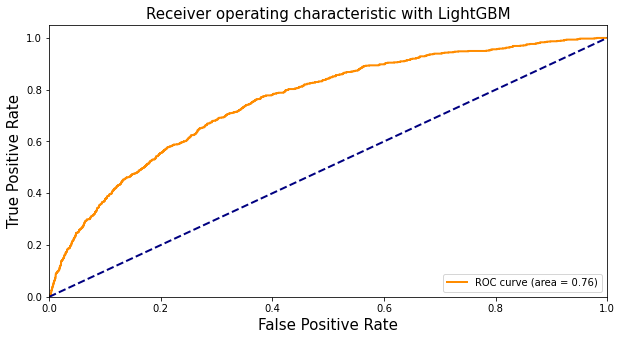

In [30]:
fig = plt.figure(1, figsize=(10, 5))

lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title("Receiver operating characteristic with LightGBM", fontsize = 15)
plt.legend(loc="lower right")
plt.show()

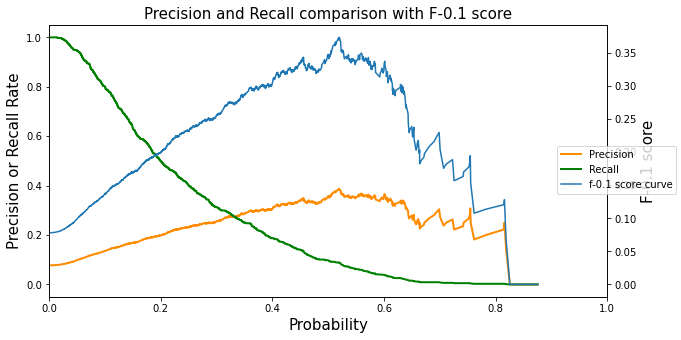

In [31]:
fig = plt.figure(1, figsize=(10, 5))
ax1 = plt.subplot()
#fig, ax1 = plt.subplots()
lw = 2
ax1.plot(
    thresh,
    prec[:-1],
    color="darkorange",
    lw=lw,
    label="Precision" % auc,
)
ax1.plot(
    thresh,
    rec[:-1],
    color="green",
    lw=lw,
    label="Recall" % auc,
)

ax1.set_xlabel("Probability" ,fontsize = 15)
ax1.set_ylabel("Precision or Recall Rate",fontsize = 15)
ax1.set_xlim([0,1])

ax2 = ax1.twinx()
ax2.plot(
    thresh,
    fbres,
    label="f-0.1 score curve" )
ax2.set_ylabel("F-0.1 score",fontsize = 15)


ax1.set_title("Precision and Recall comparison with F-0.1 score",fontsize = 15)
fig.legend(loc="right")
fig.show()

### gestion overfiting et underfiting

In [32]:
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy = 0.5)
clf = LGBMClassifier(**params_lgbm)

steps = [("over", over), ("under", under), ("model", clf)]
pipeline = Pipeline(steps=steps)

pipeline.fit(data_train_T[feats], data_train_T["TARGET"])

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.2)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model',
                 LGBMClassifier(learning_rate=0.01, n_estimators=1000,
                                num_leaves=20))])

In [33]:
# save the model to disk
import joblib
joblib.dump(pipeline, 'pipeline_housing.joblib')


# Sauvegarde du modèle banking
#pickle.dump(clf, open('banking_model.md', 'wb'))



['pipeline_housing.joblib']

### Importance des features globale

In [34]:
features = pd.DataFrame()

In [35]:
features["importances"] = clf.feature_importances_

In [36]:
features["features"] = feats

In [37]:
features.sort_values(by=["importances"], ascending=False, inplace=True)

In [38]:
features

,importances,features
32,1277,EXT_SOURCE_3
31,835,EXT_SOURCE_2
242,802,PAYMENT_RATE
12,780,DAYS_ID_PUBLISH
30,717,EXT_SOURCE_1
...,...,...
379,0,PREV_CNT_PAYMENT_MEAN
380,0,PREV_CNT_PAYMENT_SUM
381,0,PREV_NAME_CONTRACT_TYPE_Cashloans_MEAN
123,0,NAME_EDUCATION_TYPE_Academicdegree


In [39]:
features.to_csv('features_import.csv')


Text(0.5, 1.0, 'Feature importances')

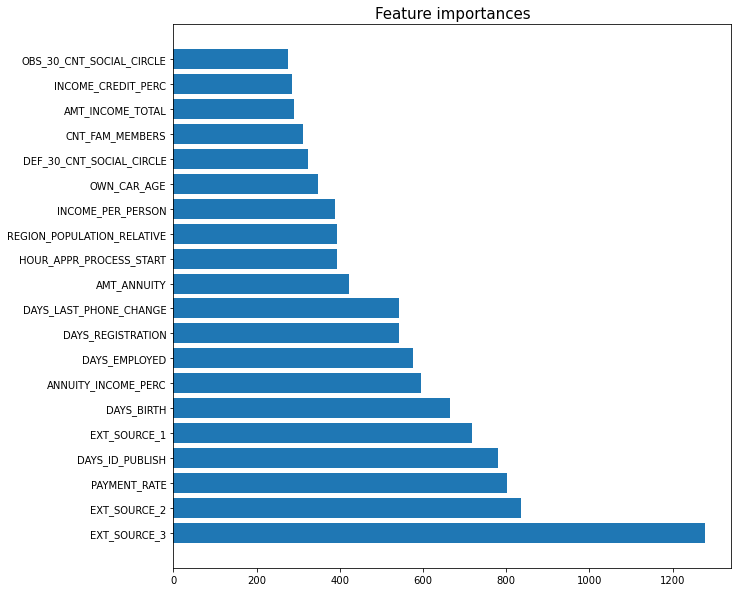

In [40]:
fig = plt.figure(figsize=(10,10))
plt.barh(features["features"][:20], features["importances"][:20])
plt.title("Feature importances", fontsize = 15)

In [41]:


def plot_feature_importances(df):

    
    # Sort features according to importance
    df = features.sort_values('importances', ascending=False)
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importances'] / df['importances'].sum()
    
    return df



In [42]:
plot_feature_importances(feats)

,importances,features,importance_normalized
32,1277,EXT_SOURCE_3,0.067211
31,835,EXT_SOURCE_2,0.043947
242,802,PAYMENT_RATE,0.042211
12,780,DAYS_ID_PUBLISH,0.041053
30,717,EXT_SOURCE_1,0.037737
...,...,...,...
748,0,CC_NAME_CONTRACT_STATUS_Demand_VAR,0.000000
757,0,CC_NAME_CONTRACT_STATUS_Signed_SUM,0.000000
755,0,CC_NAME_CONTRACT_STATUS_Signed_MAX,0.000000
754,0,CC_NAME_CONTRACT_STATUS_Signed_MIN,0.000000


In [43]:
import shap
import joblib
shap.initjs()

explainer = shap.TreeExplainer(clf)
joblib.dump(explainer, "shap_explainer.joblib")



['shap_explainer.joblib']

In [44]:
shap_values = explainer.shap_values(data_test_T[feats])

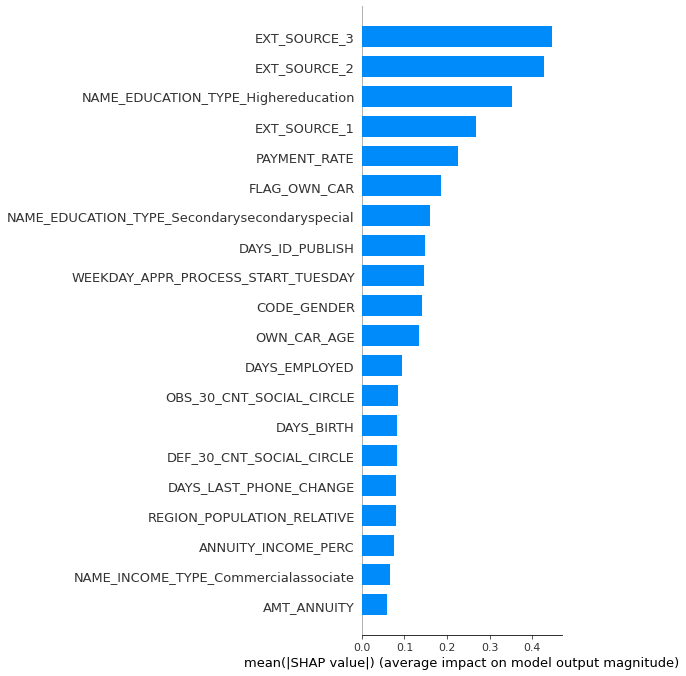

In [45]:
shap.summary_plot(shap_values[1], data_test_T[feats], plot_type='bar')

In [46]:
data

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9995,172551,NaN,1,0,0,0,135000.0,454500.0,29173.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,9996,172556,NaN,0,1,1,1,180000.0,500490.0,52555.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,9997,172562,NaN,1,0,0,0,202500.0,523152.0,37336.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,9998,172570,NaN,0,0,0,1,382500.0,967500.0,31338.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0


In [47]:
data.isna().sum().sum()

10748727

In [48]:
import re
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [49]:
data.isna().sum().sum()

0

In [50]:

del data['index']

In [51]:
data

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,172551,0.0,1,0,0,0,135000.0,454500.0,29173.5,454500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,172556,0.0,0,1,1,1,180000.0,500490.0,52555.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,172562,0.0,1,0,0,0,202500.0,523152.0,37336.5,463500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,172570,0.0,0,0,0,1,382500.0,967500.0,31338.0,967500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
data.sort_values(by=["SK_ID_CURR"], inplace=True)

In [53]:
data

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
10000,100001,0.0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001,100005,0.0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,172551,0.0,1,0,0,0,135000.0,454500.0,29173.5,454500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,172556,0.0,0,1,1,1,180000.0,500490.0,52555.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,172562,0.0,1,0,0,0,202500.0,523152.0,37336.5,463500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,172570,0.0,0,0,0,1,382500.0,967500.0,31338.0,967500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
data.reset_index(drop=True, inplace=True)

In [55]:
data

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100001,0.0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100005,0.0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,172551,0.0,1,0,0,0,135000.0,454500.0,29173.5,454500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,172556,0.0,0,1,1,1,180000.0,500490.0,52555.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,172562,0.0,1,0,0,0,202500.0,523152.0,37336.5,463500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,172570,0.0,0,0,0,1,382500.0,967500.0,31338.0,967500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
data_exp = data.head(1000)

In [57]:
data_exp

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100001,0.0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100005,0.0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,100996,1.0,1,0,1,1,94500.0,675000.0,26154.0,675000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,100997,0.0,1,0,0,0,180000.0,199152.0,10296.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,100998,0.0,0,1,1,1,112500.0,601470.0,30838.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,100999,0.0,0,1,1,0,450000.0,2125953.0,81108.0,1984500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
def solvability_clients(dataframe):
    """ Pieplot de la solvabilité clients, prend un paramètre (dataframe)"""
    # % de valeurs 'TARGET' différentes
    target_values = dataframe['TARGET'].value_counts()/len(dataframe)*100
    # Pieplot du % de chaque valeurs différentes de 'TARGET'
    fig = plt.figure(1, figsize=(20, 8))
    plt.title(" Solvabilité des clients",  fontsize = 20)
    plt.pie(target_values,
            colors=['#2ecc71', '#e74c3c'],
            autopct='%1.1f%%',
            labels=["Remboursé", "défaut de payement"],
            startangle=90)
    plt.show()



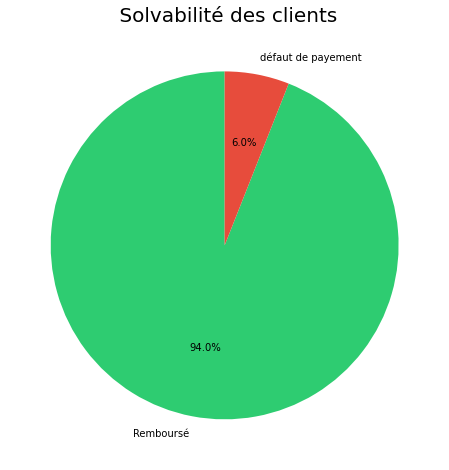

In [59]:
# Pieplot de solvabilité des clients du jeu d'entrainement
solvability_clients(data_exp)

In [60]:
client_id = data_exp['SK_ID_CURR']
client_id = client_id.to_list()


In [61]:
#client_id.to_csv('client_id.csv')
np.savetxt("custumers.csv", np.atleast_2d(client_id), fmt="%s", delimiter=",")

In [62]:
data_exp.to_pickle("data.gz", compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})

In [63]:
round((data_exp["DAYS_BIRTH"] / -365),0).loc[0]

53.0

In [64]:
#data_exp["DAYS_BIRTH"]
age = round((data_exp["DAYS_BIRTH"] / 365), 2)
age = -age
age.max()


68.78

In [65]:
feats

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APA

In [66]:
#data_exp.columns
#round((data_exp["DAYS_BIRTH"] / -365), 0).values.tolist()

#pd.DataFrame(data_exp["AMT_INCOME_TOTAL"])
#pd.DataFrame(data_exp["AMT_INCOME_TOTAL"]).loc[data_exp['AMT_INCOME_TOTAL'] < 200000, :]
df_income = data_exp.loc[data_exp['AMT_INCOME_TOTAL'] < 200000, :]
df_income['AMT_INCOME_TOTAL']
#Data_global.loc[(Data_global['Indicator Code']=='SP.POP.TOTL') 

0      135000.0
3       67500.0
4       99000.0
5      135000.0
6      121500.0
         ...   
994    157500.0
995     94500.0
996    180000.0
997    112500.0
999    157500.0
Name: AMT_INCOME_TOTAL, Length: 706, dtype: float64

In [67]:
data_exp['AMT_INCOME_TOTAL']

0      135000.0
1      202500.0
2      270000.0
3       67500.0
4       99000.0
         ...   
995     94500.0
996    180000.0
997    112500.0
998    450000.0
999    157500.0
Name: AMT_INCOME_TOTAL, Length: 1000, dtype: float64

In [68]:
round(data_exp["AMT_CREDIT"].mean(), 2)

584788.59

In [69]:
 lst_infos = [data_exp.shape[0], round(data_exp["AMT_INCOME_TOTAL"].mean(), 2), round(data_exp["AMT_CREDIT"].mean(), 2)]

In [70]:
lst_infos

[1000, 168833.18, 584788.59]

In [71]:
data_exp.TARGET.value_counts()


0.0    940
1.0     60
Name: TARGET, dtype: int64

In [72]:
explainer.shap_values(data_exp[feats].loc[0].to_numpy().reshape(1, -1))[1][0][:]

array([-6.06412598e-02,  4.36275160e-02,  3.22356584e-03,  1.57546690e-02,
       -1.40012778e-02, -1.69086148e-02, -7.10767768e-02, -1.03574889e-02,
        5.77629345e-02,  5.08097637e-03, -1.88117521e-02,  3.36563773e-02,
        2.01810156e-01, -6.38138139e-02,  0.00000000e+00, -9.72136689e-03,
        7.41993620e-03,  0.00000000e+00,  2.45894040e-02, -9.65257242e-04,
       -2.93506275e-02,  1.86526774e-04,  7.30798893e-05, -1.51742738e-01,
        0.00000000e+00,  5.37439318e-04,  4.70197791e-03,  4.91599908e-04,
        2.97453500e-04,  7.50520499e-03, -4.22774655e-01, -9.93655554e-01,
        6.93123430e-01,  5.53567886e-02,  2.46859772e-03,  3.48984709e-02,
        1.76354468e-03,  1.80311828e-03, -2.34732733e-03, -4.22935283e-02,
        1.12367292e-02, -2.69296925e-03,  8.46226577e-03,  1.81940487e-04,
        4.88820942e-03, -2.91867123e-04, -1.25870603e-03, -7.34957780e-03,
       -3.55984134e-02, -6.55028282e-02,  4.68420731e-03,  3.72804197e-03,
       -3.15519292e-03, -

In [73]:
data_test_T[feats].columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=765)

In [74]:
data_test_data_frame = pd.DataFrame(data_test_T, columns=data_test_T[feats].columns, index=data_test_T.index)
data_test_data_frame



,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,135000.0,454500.0,29173.5,454500.0,0.028663,-18338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0,1,1,1,180000.0,500490.0,52555.5,450000.0,0.046220,-15040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,0,0,0,202500.0,523152.0,37336.5,463500.0,0.032561,-17225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0,0,0,1,382500.0,967500.0,31338.0,967500.0,0.072508,-14852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
#import lime
#lime1 = LimeTabularExplainer(data_test_data_frame,
 #                            feature_names=data_test_data_frame.columns,
  #                           class_names=["Solvable", "Non Solvable"],
   #                          discretize_continuous=False)



NameError: name 'LimeTabularExplainer' is not defined